# Presentación

**Ciencia y Analítica de Datos**

Equipo 40

Por:

*   **Víctor Alejandro Regueira Romero - A01794404**

Profesor asignado:

*   Roberto Antonio Guevara González

A 22 de octubre de 2022

---

# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A1 = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [18]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W
print("-----------------------------")
#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
print("W")
print(W)
Winv = np.linalg.inv(W)
print("Winv")
print(Winv)
D = np.diag(values)
print("D")
print(D)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
#Hay que considerar que se debe de hacer el producto punto de las matrices.
B = np.dot(np.dot(W,D),Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-----------------------------
W
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
Winv
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
D
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.38433605e-16]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**La reconstruccion de B=W*D*Winv da como resultado la matriz A.**

### Función para realizar la **Descomposición** y **Reconstrucción**

In [19]:

def pca(X):
    #Imprimimos la matriz original
    print("-------Matriz original-------")
    print(X)
    print("-----------------------------")
    #Calculamos los valores y vectores eigen
    values, vectors = eig(X)
    #Definimos W, Winv y D
    W = vectors
    Winv = np.linalg.inv(W)
    D = np.diag(values)
    #Reconstruimos la matriz
    print("-------Matriz reconstruida-------")
    #Producto punto
    B = np.dot(np.dot(W,D),Winv)
    print(B.round(2))
    print("-----------------------------")

In [20]:
#Prueba
A = array([[1, 1, 1], [1, 1, 1],[1,1,1]])
pca(A)

-------Matriz original-------
[[1 1 1]
 [1 1 1]
 [1 1 1]]
-----------------------------
-------Matriz reconstruida-------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
-----------------------------


In [21]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
pca(A1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.-0.j -0.-0.j  2.-0.j]
 [ 3.+0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.+0.j  1.-0.j]]
-----------------------------


In [22]:
#Matriz 2
A2 = array([[1,3,8], [2,0,0], [0,0,1]])
pca(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [23]:
#Matriz 3
A3 = array([[5,4,0], [1,0,1], [10,7,1]])
pca(A3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.  4.  0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


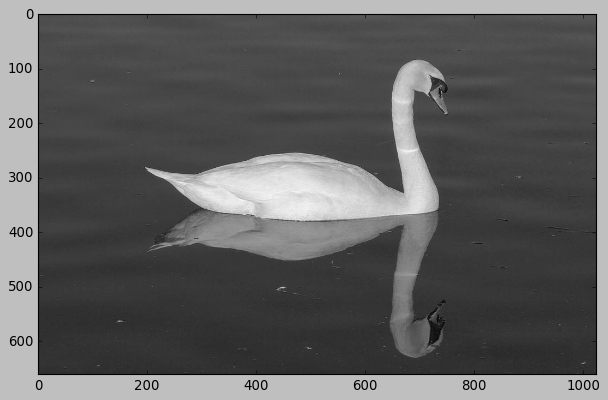

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x660 at 0x24F244D6E50>


In [24]:
from six.moves import urllib 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic') # Configuración de gráfico "classic".
#Importando la imagen, la pone en escala de grises y la asigana a la variable img.
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg'))
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')

#Matriz con el valor de los pixeles de la imagen, en formato float
imgmat = np.array(list(imggray.getdata(band=0)),float) 

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [25]:
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U[:2])
print("---")
print(D[:2])
print("---")
print(V[:2])

(660, 1024)
[[-0.03593761 -0.03227204  0.06327023 ...  0.07276753  0.06971003
  -0.09143059]
 [-0.03596717 -0.03248687  0.06296996 ... -0.04498177 -0.03511139
   0.15735037]]
---
[66599.64354529 15354.73100072]
---
[[-0.02240187 -0.02246798 -0.02253651 ... -0.0228316  -0.02285465
  -0.02288675]
 [-0.03028157 -0.03033544 -0.03031803 ... -0.03080711 -0.03070707
  -0.03061059]]


In [26]:
U.shape

(660, 660)

In [27]:
V.shape

(1024, 1024)

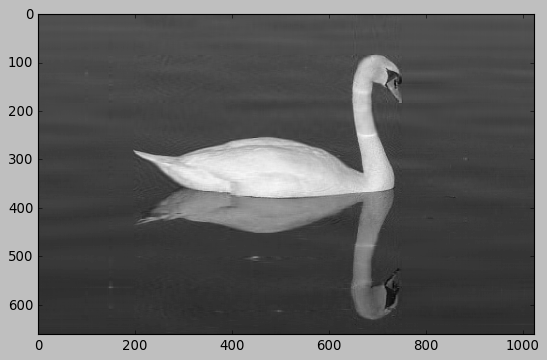

Felicidades la imagen está comprimida


In [28]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue]) * np.diag(D[:nvalue]) * np.matrix(V[:nvalue,:])
#
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

In [29]:
#imagen 1


In [30]:
#imagen 2

In [31]:
#imagen 3

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [32]:
#tu codigo aqui

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [33]:
df_X = pd.DataFrame(X)

In [34]:
df_X

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832
